In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from transformers import DistilBertForSequenceClassification, AdamW, DistilBertTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
product = pd.read_csv("product_info.csv")
product.head

<bound method NDFrame.head of      product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

         

In [11]:
#that's a mess let's see what we wanna use
product.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [12]:
df = pd.read_csv("reviews_0_250.csv")
df.head

/var/folders/bw/c869440166q2zj4982vwkhrw0000gn/T/ipykernel_4585/2254455881.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reviews_0_250.csv")


<bound method NDFrame.head of         Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0                0   1741593524       5             1.0          1.0   
1                1  31423088263       1             0.0          NaN   
2                2   5061282401       5             1.0          NaN   
3                3   6083038851       5             1.0          NaN   
4                4  47056667835       5             1.0          NaN   
...            ...          ...     ...             ...          ...   
602125      602125   7446977307       5             1.0          1.0   
602126      602126   1991973234       5             1.0          1.0   
602127      602127   1339171721       5             1.0          1.0   
602128      602128   1917233409       5             1.0          1.0   
602129      602129   1244540073       5             1.0          1.0   

        total_feedback_count  total_neg_feedback_count  \
0                          2                   

In [13]:
df.dtypes

Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [14]:
df = df[['product_name', 'rating', 'review_text', 'is_recommended']]
df.head()

,product_name,rating,review_text,is_recommended
0,Gentle Hydra-Gel Face Cleanser,5,I use this with the Nudestix “Citrus Clean Bal...,1.0
1,Lip Sleeping Mask Intense Hydration with Vitam...,1,I bought this lip mask after reading the revie...,0.0
2,Lip Sleeping Mask Intense Hydration with Vitam...,5,My review title says it all! I get so excited ...,1.0
3,Lip Sleeping Mask Intense Hydration with Vitam...,5,I’ve always loved this formula for a long time...,1.0
4,Lip Sleeping Mask Intense Hydration with Vitam...,5,"If you have dry cracked lips, this is a must h...",1.0


In [15]:
df.is_recommended.value_counts()

is_recommended
1.0    406094
0.0     78550
Name: count, dtype: int64

In [16]:
print("Recommended", round(df.is_recommended.value_counts()[1]/len(df) *100 ,2), "%")
print("Not Recommended", round(df.is_recommended.value_counts()[0]/len(df) *100 ,2), "%")

Recommended 67.44 %
Not Recommended 13.05 %


In [17]:
#not balanced

In [18]:
df.isnull().sum()

product_name           0
rating                 0
review_text          999
is_recommended    117486
dtype: int64

In [19]:
df = df.dropna()
df.isnull().sum()

product_name      0
rating            0
review_text       0
is_recommended    0
dtype: int64

In [20]:
print("Recommended", round(df.is_recommended.value_counts()[1]/len(df) *100 ,2), "%")
print("Not Recommended", round(df.is_recommended.value_counts()[0]/len(df) *100 ,2), "%")

Recommended 83.79 %
Not Recommended 16.21 %


In [21]:
#looks better

In [22]:
duplicates = df.duplicated(subset=['review_text']).sum()
df = df.drop_duplicates()
print(duplicates)

84791


In [23]:
#let's start modeling a little

In [68]:
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [25]:
X = df['review_text']
y = df['is_recommended']  

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(max_features=1000)

In [27]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [28]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test_tfidf)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [56]:
print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model Accuracy: 0.9207570650764844
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73     15478
         1.0       0.94      0.97      0.95     80947

    accuracy                           0.92     96425
   macro avg       0.87      0.82      0.84     96425
weighted avg       0.92      0.92      0.92     96425



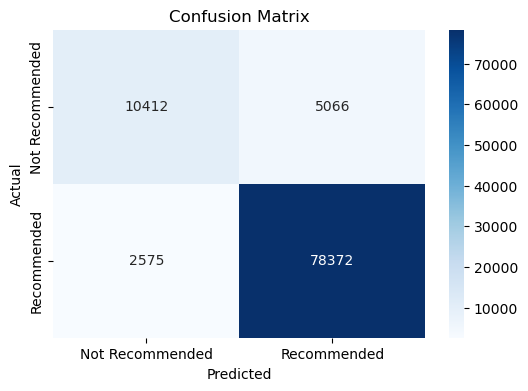

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()